### Examine data

In [ ]:
# cloud_point_data_path = 'shapenetcorev2_hdf5_2048_downsampled_v3'
cloud_point_data_path = 'shapenetcorev2_hdf5_2048'
import os
import sys
from pathlib import Path
import json


train_path = os.path.join(cloud_point_data_path, 'train_files.txt')
test_path = os.path.join(cloud_point_data_path, 'test_files.txt')
val_path = os.path.join(cloud_point_data_path, 'val_files.txt')

train_ids = []
test_ids = []
val_ids = []

with open(train_path, 'r') as f:
	for line in f : 
		train_ids.append(line.split("/")[-1].split(".")[0])

with open(test_path, 'r') as f:
	for line in f : 
		test_ids.append(line.split("/")[-1].split(".")[0])

with open(val_path, 'r') as f:
	for line in f : 
		val_ids.append(line.split("/")[-1].split(".")[0])


In [13]:
selected_categories = ['table', 'sofa', 'bench', 'chair', 'cabinet', 'lamp']

In [ ]:
train_obj_counts = {}

for idx in train_ids: 
	with open(os.path.join(cloud_point_data_path, idx + "_id2name.json"), 'r') as f : 
		data = json.loads(f.read())
		print(f"idx {idx} length: {len(data)}")
		for obj in data:
			if obj in train_obj_counts and obj in selected_categories:
				train_obj_counts[obj] += 1
			elif obj in selected_categories:
				train_obj_counts[obj] = 1
			else :
				pass
train_obj_counts

idx train0 length: 2048
idx train1 length: 2048
idx train2 length: 2048
idx train3 length: 2048
idx train4 length: 2048
idx train5 length: 2048
idx train6 length: 2048
idx train7 length: 2048
idx train8 length: 2048
idx train9 length: 2048
idx train10 length: 2048
idx train11 length: 2048
idx train12 length: 2048
idx train13 length: 2048
idx train14 length: 1274


{'table': 1920,
 'lamp': 1852,
 'chair': 1920,
 'cabinet': 1235,
 'bench': 1446,
 'sofa': 1920}

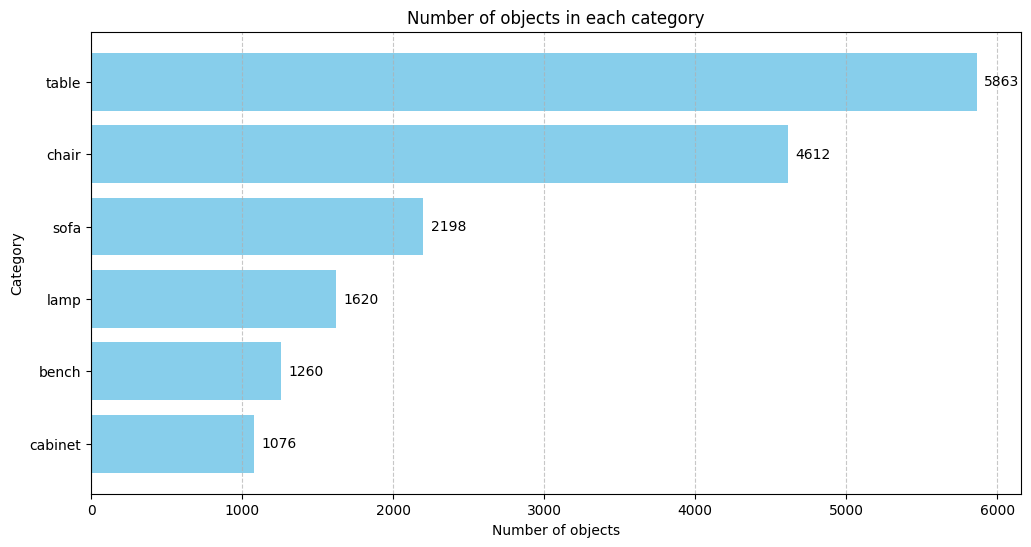

In [6]:
import matplotlib.pyplot as plt

sorted_train_obj = sorted(train_obj_counts.items(), key=lambda x: x[1])

categories, counts = zip(*sorted_train_obj)

plt.figure(figsize=(12, 6))
plt.barh(categories, counts, color='skyblue')

plt.xlabel("Number of objects")
plt.ylabel("Category")
plt.title("Number of objects in each category")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(counts):
    plt.text(value + 50, index, str(value), va='center')

plt.show()


In [15]:
val_obj_counts = {}

for idx in val_ids: 
	with open(os.path.join(cloud_point_data_path, idx + "_id2name.json"), 'r') as f : 
		data = json.loads(f.read())
		print(f"idx {idx} length: {len(data)}")
		for obj in data:
			if obj in val_obj_counts and obj in selected_categories:
				val_obj_counts[obj] += 1
			elif obj in selected_categories:
				val_obj_counts[obj] = 1
			else : 
				pass
val_obj_counts

idx val0 length: 2048
idx val1 length: 1696


{'table': 240,
 'bench': 181,
 'sofa': 240,
 'chair': 240,
 'lamp': 232,
 'cabinet': 154}

In [16]:
test_obj_counts = {}

for idx in test_ids: 
	with open(os.path.join(cloud_point_data_path, idx + "_id2name.json"), 'r') as f : 
		data = json.loads(f.read())
		print(f"idx {idx} length: {len(data)}")
		for obj in data:
			if obj in test_obj_counts and obj in selected_categories:
				test_obj_counts[obj] += 1
			elif obj in selected_categories:
				test_obj_counts[obj] = 1
			else : 
				pass
test_obj_counts

idx test0 length: 2048
idx test1 length: 1696


{'lamp': 232,
 'chair': 240,
 'cabinet': 154,
 'sofa': 240,
 'bench': 181,
 'table': 240}

In [17]:
total_counts = {}
for obj in selected_categories:
	total_counts[obj] = train_obj_counts[obj] + val_obj_counts[obj] + test_obj_counts[obj]
total_counts

{'table': 2400,
 'sofa': 2400,
 'bench': 1808,
 'chair': 2400,
 'cabinet': 1543,
 'lamp': 2316}

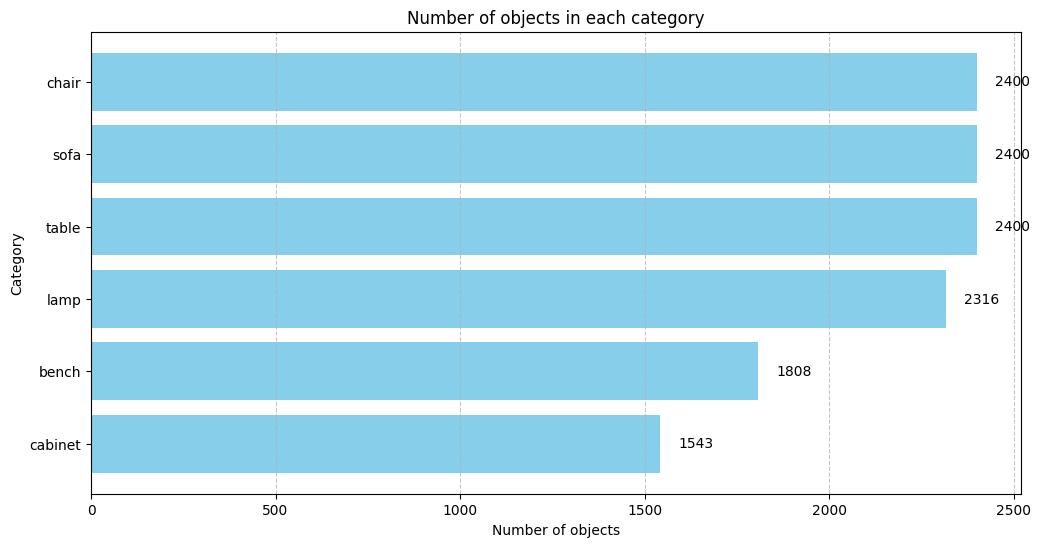

In [18]:
import matplotlib.pyplot as plt

sorted_total_obj = sorted(total_counts.items(), key=lambda x: x[1])

categories, counts = zip(*sorted_total_obj)

plt.figure(figsize=(12, 6))
plt.barh(categories, counts, color='skyblue')

plt.xlabel("Number of objects")
plt.ylabel("Category")
plt.title("Number of objects in each category")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(counts):
    plt.text(value + 50, index, str(value), va='center')

plt.show()


In [48]:
MAX_SAMPLES = 2400

for key, value in total_counts.items() : 
	if value > MAX_SAMPLES:
		total_counts[key] = MAX_SAMPLES

print(total_counts)

total_objects = sum(total_counts.values())
print(f"Total objects: {total_objects}")

{'table': 2400, 'sofa': 2400, 'bench': 1808, 'chair': 2400, 'cabinet': 1543, 'lamp': 2316}
Total objects: 12867


In [49]:
desired_train_counts = {}
desired_val_counts = {}
desired_test_counts = {}

for obj in selected_categories:
	desired_train_counts[obj] = int(total_counts[obj] * 0.8)
	desired_val_counts[obj] = int(total_counts[obj] * 0.1)
	desired_test_counts[obj] = desired_train_counts[obj] - desired_val_counts[obj]

desired_train_counts, desired_val_counts, desired_test_counts

({'table': 1920,
  'sofa': 1920,
  'bench': 1446,
  'chair': 1920,
  'cabinet': 1234,
  'lamp': 1852},
 {'table': 240,
  'sofa': 240,
  'bench': 180,
  'chair': 240,
  'cabinet': 154,
  'lamp': 231},
 {'table': 1680,
  'sofa': 1680,
  'bench': 1266,
  'chair': 1680,
  'cabinet': 1080,
  'lamp': 1621})

#### Read file h5

In [50]:
import h5py
import numpy as np

file_path = os.path.join(cloud_point_data_path, 'train0.h5')
h5_data = np.empty([0, 2048, 3], dtype=np.float32)
h5_label = np.empty([0, 1], dtype=np.int32)
with h5py.File(file_path, 'r') as h5_file:
	print(f"Keys: {h5_file.keys()}")
	data = h5_file['data'][:]
	print(f"label shape: {h5_file['label'].shape}")
	h5_data = np.concatenate((h5_data, h5_file['data'][:]), axis=0)
	h5_label = np.concatenate((h5_label, h5_file['label'][:]), axis=0)
	
h5_data.shape, h5_label.shape
	
	

Keys: <KeysViewHDF5 ['data', 'label']>
label shape: (2048, 1)


((2048, 2048, 3), (2048, 1))

In [47]:
h5_label[0]

array([52])

### Downsample data

In [51]:
import random 
import h5py

full_name_data = []
full_file_data = []
full_points_data_h5 = np.empty([0, 2048, 3], dtype=np.float32)
full_label_data_h5 = np.empty([0, 1], dtype=np.int32)

for idx in train_ids : 
	name_json = os.path.join(cloud_point_data_path, idx + "_id2name.json")
	file_json = os.path.join(cloud_point_data_path, idx + "_id2file.json")
	file_h5 = os.path.join(cloud_point_data_path, idx + ".h5")

	with open(name_json) as f_name:
		data = json.loads(f_name.read())
		full_name_data.extend(data)
	with open(file_json) as f_file : 
		data = json.loads(f_file.read())
		full_file_data.extend(data)
	with h5py.File(file_h5, 'r') as h5_file:
		full_points_data_h5 = np.concatenate((full_points_data_h5, h5_file['data'][:]), axis=0)
		full_label_data_h5 = np.concatenate((full_label_data_h5, h5_file['label'][:]), axis=0)

for idx in val_ids : 
	name_json = os.path.join(cloud_point_data_path, idx + "_id2name.json")
	file_json = os.path.join(cloud_point_data_path, idx + "_id2file.json")
	file_h5 = os.path.join(cloud_point_data_path, idx + ".h5")

	with open(name_json) as f_name:
		data = json.loads(f_name.read())
		full_name_data.extend(data)
	with open(file_json) as f_file : 
		data = json.loads(f_file.read())
		full_file_data.extend(data)
	with h5py.File(file_h5, 'r') as h5_file:
		full_points_data_h5 = np.concatenate((full_points_data_h5, h5_file['data'][:]), axis=0)
		full_label_data_h5 = np.concatenate((full_label_data_h5, h5_file['label'][:]), axis=0)

for idx in test_ids :
	name_json = os.path.join(cloud_point_data_path, idx + "_id2name.json")
	file_json = os.path.join(cloud_point_data_path, idx + "_id2file.json")
	file_h5 = os.path.join(cloud_point_data_path, idx + ".h5")

	with open(name_json) as f_name:
		data = json.loads(f_name.read())
		full_name_data.extend(data)
	with open(file_json) as f_file : 
		data = json.loads(f_file.read())
		full_file_data.extend(data)
	with h5py.File(file_h5, 'r') as h5_file:
		full_points_data_h5 = np.concatenate((full_points_data_h5, h5_file['data'][:]), axis=0)
		full_label_data_h5 = np.concatenate((full_label_data_h5, h5_file['label'][:]), axis=0)

print(len(full_name_data), len(full_file_data), len(full_points_data_h5), len(full_label_data_h5))
	

51127 51127 51127 51127


In [52]:
def downsample_data(points, labels, names, files, max_samples=2500) : 
	unique_labels, counts = np.unique(labels, return_counts=True)
	
	keep_indices = []

	for label in unique_labels: 
		label_indices = np.where(labels == label)[0]

		if len(label_indices) > max_samples: 
			selected_indices = np.random.choice(label_indices, max_samples, replace=False)
			keep_indices.extend(selected_indices)
		else : 
			keep_indices.extend(label_indices)
	keep_indices = sorted(keep_indices)
	
	downsampled_points = points[keep_indices]
	downsample_labels = labels[keep_indices]
	downsample_names = [names[i] for i in keep_indices]
	downsample_files = [files[i] for i in keep_indices]

	return downsampled_points, downsample_labels, downsample_names, downsample_files


full_points_data_h5, full_label_data_h5, full_name_data, full_file_data = downsample_data(full_points_data_h5, full_label_data_h5, full_name_data, full_file_data, max_samples=MAX_SAMPLES)


In [53]:
print(f"After downsampling:")
print(f"Points shape: {full_points_data_h5.shape}")
print(f"Labels shape: {full_label_data_h5.shape}")
print(f"Names length: {len(full_name_data)}")
print(f"Files length: {len(full_file_data)}")

After downsampling:
Points shape: (37434, 2048, 3)
Labels shape: (37434, 1)
Names length: 37434
Files length: 37434


### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# first split : 90% train+val, 10% test
train_val_points, test_points, \
train_val_labels, test_labels, \
train_val_names, test_names, \
train_val_files, test_files = train_test_split(
    full_points_data_h5, 
    full_label_data_h5,
    full_name_data,
    full_file_data,
    test_size=0.1,
    random_state=42,
    stratify=full_label_data_h5
)

# second split
train_points, val_points, \
train_labels, val_labels, \
train_names, val_names, \
train_files, val_files = train_test_split(
    train_val_points,
    train_val_labels,
    train_val_names,
    train_val_files,
    test_size=1/9,
    random_state=42,
    stratify=train_val_labels
)

print("Data split sizes:")
print(f"Train - Points: {train_points.shape}, Labels: {train_labels.shape}, Names: {len(train_names)}")
print(f"Val   - Points: {val_points.shape}, Labels: {val_labels.shape}, Names: {len(val_names)}")
print(f"Test  - Points: {test_points.shape}, Labels: {test_labels.shape}, Names: {len(test_names)}")

Data split sizes:
Train - Points: (29946, 2048, 3), Labels: (29946, 1), Names: 29946
Val   - Points: (3744, 2048, 3), Labels: (3744, 1), Names: 3744
Test  - Points: (3744, 2048, 3), Labels: (3744, 1), Names: 3744


In [55]:
unique_labels, counts = np.unique(train_names, return_counts=True)
label_counts = dict(zip(unique_labels, counts))
label_counts = {key: value for key, value in label_counts.items() if key in selected_categories}
label_counts

{np.str_('bench'): np.int64(1446),
 np.str_('cabinet'): np.int64(1235),
 np.str_('chair'): np.int64(1920),
 np.str_('lamp'): np.int64(1852),
 np.str_('sofa'): np.int64(1920),
 np.str_('table'): np.int64(1920)}

#### Save to new dataset

In [56]:
import os
import json
import math

new_dataset_path = 'shapenetcorev2_hdf5_2048_downsampled_v3'

os.makedirs(new_dataset_path, exist_ok=True)

def save_id2file_file(data_path, mode, id2file_data) : 
	num_samples = len(id2file_data)
	num_files = math.ceil(num_samples / 2048)

	for i in range(num_files): 
		start_idx = i * 2048
		end_idx = min((i + 1) * 2048, num_samples)

		chunk_data = id2file_data[start_idx:end_idx]

		file_name = f"{mode}{i}_id2file.json"
		file_path = os.path.join(data_path, file_name)

		with open(file_path, 'w') as f: 
			json.dump(chunk_data, f)
	
	return num_files

def save_id2name_file(data_path, mode, id2name_data) :
	num_samples = len(id2name_data)
	num_files = math.ceil(num_samples / 2048)

	for i in range(num_files): 
		start_idx = i * 2048
		end_idx = min((i + 1) * 2048, num_samples)

		chunk_data = id2name_data[start_idx:end_idx]

		file_name = f"{mode}{i}_id2name.json"
		file_path = os.path.join(data_path, file_name)

		with open(file_path, 'w') as f: 
			json.dump(chunk_data, f)
	
	return num_files

def save_h5_file(data_path, mode, points, labels) : 
	num_samples = points.shape[0]
	num_files = math.ceil(num_samples / 2048)

	for i in range(num_files): 
		start_idx = i * 2048
		end_idx = min((i + 1) * 2048, num_samples)

		chunk_points = points[start_idx:end_idx]
		chunk_labels = labels[start_idx:end_idx]
	
		file_name = f"{mode}{i}.h5"
		file_path = os.path.join(data_path, file_name)

		with h5py.File(file_path, 'w') as h5_file: 
			h5_file.create_dataset('data', data=chunk_points)
			h5_file.create_dataset('label', data=chunk_labels)

	return num_files
	
def create_new_dataset(data_path, mode, files, names, points, labels) : 
	num_files = save_id2file_file(data_path, mode, files)
	save_id2name_file(data_path, mode, names)
	save_h5_file(data_path, mode, points, labels)
	with open(os.path.join(data_path, f"{mode}_files.txt"), 'w') as f:
		for i in range(num_files):
			f.write(f"{data_path}/{mode}{i}.h5\n")


create_new_dataset(new_dataset_path, 'train', train_files, train_names, train_points, train_labels)
create_new_dataset(new_dataset_path, 'val', val_files, val_names, val_points, val_labels)
create_new_dataset(new_dataset_path, 'test', test_files, test_names, test_points, test_labels)